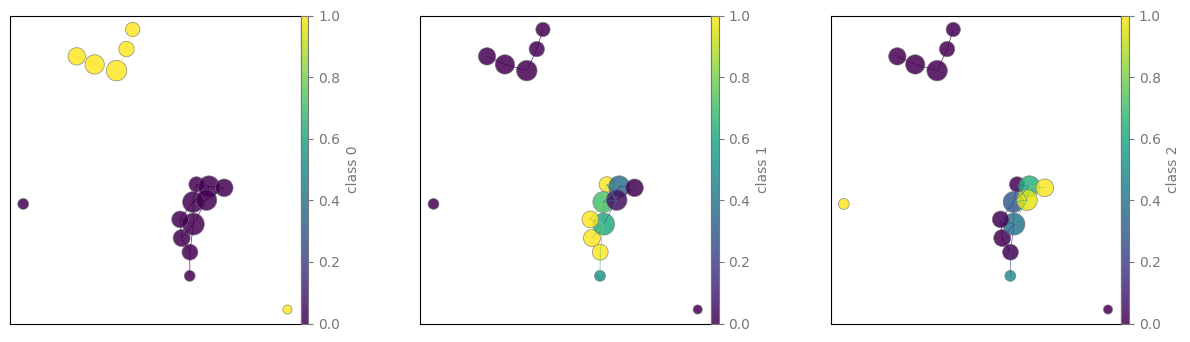

In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

iris_data = load_iris()
X, y = iris_data.data, iris_data.target
lens = PCA(2).fit_transform(X)

mapper_algo = MapperAlgorithm(cover=CubicCover(n=10, perc=0.25), clustering=TrivialClustering())
mapper_graph = mapper_algo.fit_transform(X, lens)
mapper_plot = MapperPlot(X, mapper_graph)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for c in range(3):
    colored = mapper_plot.with_colors(colors=[1 if x == c else 0 for x in list(y)])
    colored.plot(axs[c], 'matplotlib', 512, 512, f'class {c}')
